# ML Model for Handwritten digits dataset

### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop


In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


### Training data has 60000 images(x_train) and its labels(y_train).Testing data has 10000 images(x_test) and its labels(y_test). Images are of 28x28 pixels

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
y_test.shape

(10000,)

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Plotting some of the training datas and finding its corresponding labels

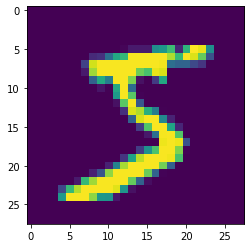

In [11]:
plt.imshow(x_train[0])

In [12]:
y_train[0]

5

0,4,1,9,2,1,3,1,4,3,5,3,6,1,7,2,8,6,9,4,0,9,1,1,2,4,3,2,7,3,

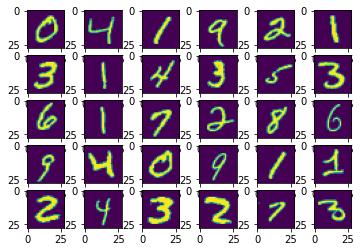

In [52]:
for i in range(1,31):
    plt.subplot(5,6,i)
    plt.imshow(x_train[i])
    print(y_train[i],end=",")

In [14]:
y_train[1]

0

## Normalizing the data
- We perform a grayscale normalization to reduce the effect of illumination's differences.
- Moreover the CNN converg faster on [0..1] data than on [0..255].

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

## # Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)

In [16]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

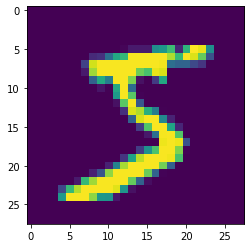

In [17]:
plt.imshow(x_train[0])

# Applying the model
- In my fiirst keras sequential i have used a convoulsion 2D,with 32 filters of 3x3, activation filter relu to remove the linearity of the data and maxpooling with pool size 2x2 to reduce the image size and to make it spatially independent.
- In second pass i am repeating same as pass 1
- in pass 3 i am using 64 filters

In [17]:
model = Sequential()

#pass 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#pass 2

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#pass 3
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the data to make it single dimension
# Dropout to make sure no  overfitting is there
# Final dense of 10 as there are 10 digits to predict(0-9)
# Final Activation function Softmax as it is a multiclass classification

In [18]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#ANN

model.add(Dense(64))  # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.4))  # Generalizing (avoiding overfitting)
model.add(Dense(64))  # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10)) #for binary class (1),
model.add(Activation('softmax')) #softmax for multiclass

model.compile(loss='sparse_categorical_crossentropy', # categorical_entropy
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          1

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
epochs = 10
batch_size = 100

## Training the model

In [22]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (x_test, y_test), verbose = 2)

Epoch 1/10
600/600 - 36s - loss: 0.5682 - accuracy: 0.8162 - val_loss: 0.1227 - val_accuracy: 0.9620
Epoch 2/10
600/600 - 35s - loss: 0.1868 - accuracy: 0.9468 - val_loss: 0.0909 - val_accuracy: 0.9728
Epoch 3/10
600/600 - 37s - loss: 0.1327 - accuracy: 0.9624 - val_loss: 0.0685 - val_accuracy: 0.9797
Epoch 4/10
600/600 - 38s - loss: 0.1097 - accuracy: 0.9693 - val_loss: 0.0659 - val_accuracy: 0.9810
Epoch 5/10
600/600 - 39s - loss: 0.0920 - accuracy: 0.9746 - val_loss: 0.0624 - val_accuracy: 0.9825
Epoch 6/10
600/600 - 35s - loss: 0.0796 - accuracy: 0.9776 - val_loss: 0.0609 - val_accuracy: 0.9826
Epoch 7/10
600/600 - 35s - loss: 0.0700 - accuracy: 0.9800 - val_loss: 0.0556 - val_accuracy: 0.9850
Epoch 8/10
600/600 - 34s - loss: 0.0642 - accuracy: 0.9823 - val_loss: 0.0553 - val_accuracy: 0.9845
Epoch 9/10
600/600 - 38s - loss: 0.0573 - accuracy: 0.9834 - val_loss: 0.0667 - val_accuracy: 0.9815
Epoch 10/10
600/600 - 36s - loss: 0.0526 - accuracy: 0.9852 - val_loss: 0.0570 - val_accura

# got an accuracy of 0.9854

# Applying data augmentation
- in order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [24]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
600/600 - 49s - loss: 0.2270 - accuracy: 0.9367 - val_loss: 0.0679 - val_accuracy: 0.9778
Epoch 2/10
600/600 - 45s - loss: 0.1595 - accuracy: 0.9546 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 3/10
600/600 - 45s - loss: 0.1427 - accuracy: 0.9590 - val_loss: 0.0561 - val_accuracy: 0.9828
Epoch 4/10
600/600 - 46s - loss: 0.1355 - accuracy: 0.9626 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 5/10
600/600 - 53s - loss: 0.1232 - accuracy: 0.9653 - val_loss: 0.0531 - val_accuracy: 0.9831
Epoch 6/10
600/600 - 56s - loss: 0.1151 - accuracy: 0.9673 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 7/10
600/600 - 48s - loss: 0.1105 - accuracy: 0.9697 - val_loss: 0.0489 - val_accuracy: 0.9861

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/10
600/600 - 49s - loss: 0.0985 - accuracy: 0.9722 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 9/10
600/600 - 48s - loss: 0.0948 - accuracy: 0.9729 - val_loss: 0.0382 - val_accuracy: 0.9889
Epoch 10/1

# After aumentation got an accuracy of 0.9881

### Saving the model and making predictions

In [ ]:
model.save('hand_written_digits.model')

In [20]:
model_pred = tf.keras.models.load_model('hand_written_digits.model')

In [21]:
predictions = model_pred.predict([x_test])

In [22]:
predictions

array([[2.08907579e-11, 3.10692542e-07, 8.33211816e-04, ...,
        9.99163628e-01, 1.78983017e-09, 1.06614735e-07],
       [8.16112447e-07, 7.50080926e-06, 9.99723732e-01, ...,
        2.08692407e-04, 3.73616047e-07, 6.88921062e-08],
       [1.48867719e-06, 9.99918818e-01, 1.49483221e-05, ...,
        1.59646934e-05, 1.68191000e-05, 4.31658037e-07],
       ...,
       [1.50268957e-13, 3.64469570e-14, 8.40636102e-11, ...,
        2.70646311e-10, 1.16866386e-06, 2.98957019e-07],
       [1.01489618e-07, 2.33765174e-10, 1.60079612e-08, ...,
        1.75168213e-10, 7.22047162e-06, 7.52639789e-06],
       [7.78949761e-05, 1.11464953e-08, 1.17490993e-06, ...,
        2.74893129e-11, 3.61071397e-06, 1.44235429e-07]], dtype=float32)

# Confusion Matrix

In [23]:
import seaborn as sns

Text(69.0, 0.5, 'Actual Value')

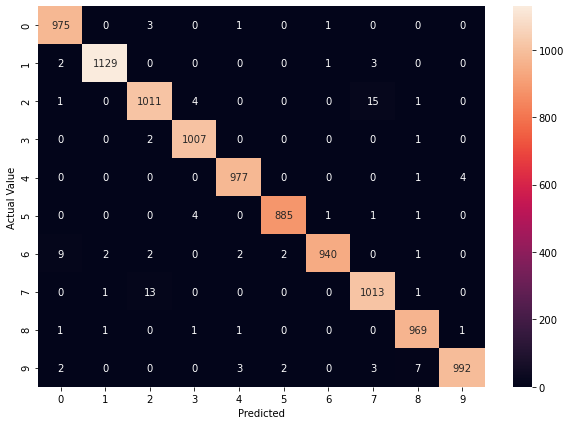

In [24]:
y_predicted = model_pred.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')

# Classification report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## predictions

In [27]:
import numpy as np

In [28]:
print(np.argmax(predictions[0]))

7


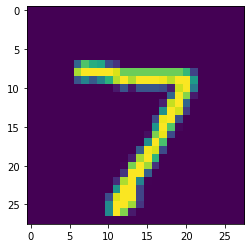

In [29]:
plt.imshow(x_test[0])

In [30]:
print(np.argmax(predictions[1000]))

9


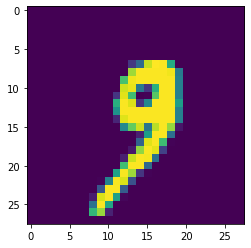

In [31]:
plt.imshow(x_test[1000])

# Using open CV to read hand written digit images and to predict

In [32]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [33]:
import cv2

In [34]:
img =cv2.imread('eight.png')

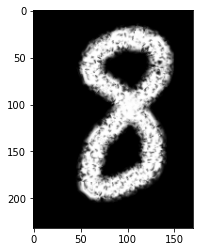

In [35]:
plt.imshow(img)

In [36]:
img.shape

(232, 170, 3)

In [37]:
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [38]:
grayImg.shape

(232, 170)

In [39]:
resImg = cv2.resize(grayImg,(28,28), interpolation = cv2.INTER_AREA)

In [40]:
newImg = tf.keras.utils.normalize(resImg,axis=1)

In [41]:
newImg=np.array(newImg).reshape(-1,28,28,1)

In [42]:
newImg.shape

(1, 28, 28, 1)

In [43]:
prediction = model_pred(newImg)

In [44]:
print(np.argmax(prediction))

8


## Created a function to predict the images
- reading images using CV2
- converting img to gray scale
- normalizing the img
- resizing the image to the size of training data
- using the model to predict
- return the prediction


In [45]:
def prediction(img):
    img =cv2.imread(img)
    grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resImg = cv2.resize(grayImg,(28,28), interpolation = cv2.INTER_AREA)
    newImg = tf.keras.utils.normalize(resImg,axis=1)
    newImg=np.array(newImg).reshape(-1,28,28,1)
    prediction = model_pred(newImg)
    ans = np.argmax(prediction)
    return ans

In [47]:
prediction('six.png')

6

In [48]:
prediction('three.png')

3

In [51]:
prediction('digit8.png')

8